In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import astropy
from astropy.io import fits

In [2]:
filters=['vv','bb','uu','w1','m2','w2']
#filters=['w2']
comps=['1','2','3','4','5','6','7','8','9','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39']
#comps=['08','09','10','11','12','13','14','15','16','17','18','19']
comps=['1','2','3','4','5','6','7','8','9','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39']
fields=['WD1657','WD1121','WD1026','SN2005am','SN2005cf','SN2006X','SN2006aj','SN2006jc','SN2007cv','SN2007on','SN2007pk','SN2009ig','SN2010al','SN2011by','SN2011hw','SN2011iw','SN2012fr','LSQ13cuw','SN2016gxp','SN2018aoz','SN2018xx','SN2018hna','SN2019hgp','SN2019np','SN2019wep','SN2019yvq','SN2020hvf','SN2021csp','SN2021yja','SN2023bee','GRB221009a'] 
fields=['WD1121']#,'WD1026','SN2005am','SN2005cf','SN2006X','SN2006aj','SN2006jc','SN2007cv','SN2007on','SN2007pk','SN2009ig','SN2010al','SN2011by','SN2011hw','SN2011iw','SN2012fr','LSQ13cuw','SN2016gxp','SN2018aoz','SN2018xx','SN2018hna','SN2019hgp','SN2019np','SN2019wep','SN2019yvq','SN2020hvf','SN2021csp','SN2021yja','SN2023bee','GRB221009a'] 
#fields=['SN2020nxt','SN2020hvf'] 
#fields=['SN2006jc','SN2006aj','M51'] 
#fields=['SN2023bee','SN2006jc','SN2006aj','M51'] 
#fields=['WD1121','WD1026','SN2023bee','SN2006jc','SN2022hrs'] 
#fields=['WD1121']#,'WD1026','SN2023bee','SN2006jc','SN2022hrs'] 
colors=['#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a','#00429d','#73a2c6', '#f4777f', '#93003a']
#centroidcolors=['#73a2c6', '#f4777f', '#93003a','#00429d']
#colors=['blue','green', 'red', 'purple']
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.style.use('classic')

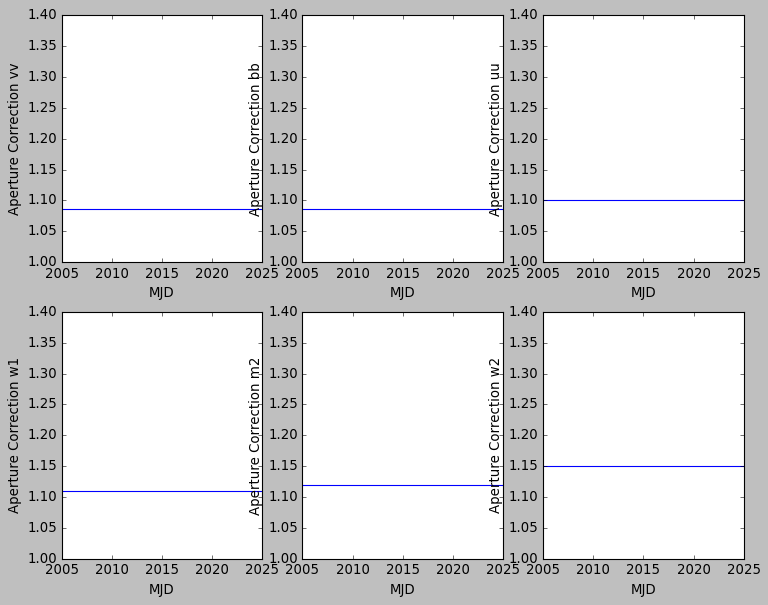

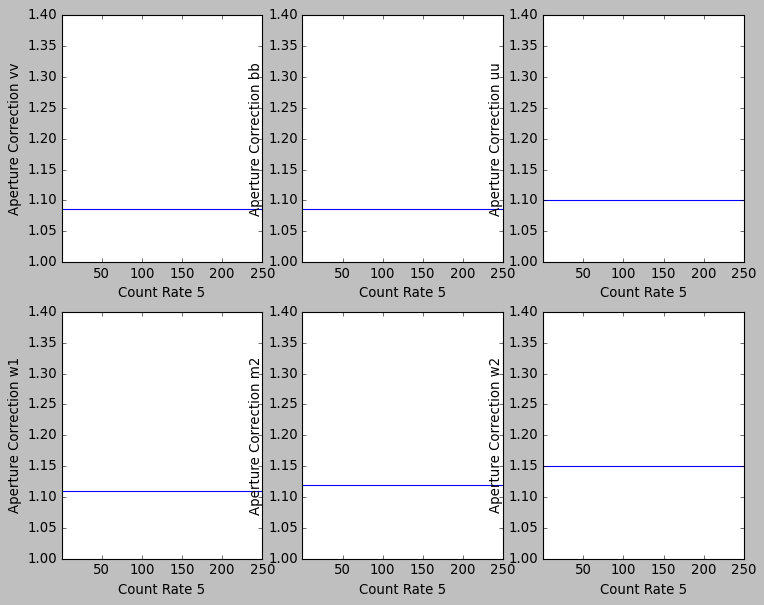

In [3]:
apcor=[1.086,1.086,1.10,1.11,1.12,1.15]

yrange=[1.0,1.4]

mjdxrange=[2005,2025]
mjd2005=53371.0
mjdfig = plt.figure(figsize=(11, 8.5))

crxrange=[0.005,250]
crfig = plt.figure(figsize=(11, 8.5))


for filter in filters:
    #print(filter)
    index=filters.index(filter)
    apcorline=[apcor[index],apcor[index]]
    
    crax = crfig.add_subplot(2,3, index+1)
    crax.set_xlabel('Count Rate 5')
    crax.set_ylabel('Aperture Correction '+filter)
    crax.axis([crxrange[0],crxrange[1],yrange[0],yrange[1]])
    crax.plot(crxrange,apcorline)

    mjdax = mjdfig.add_subplot(2,3, index+1)
    mjdax.set_xlabel('MJD')
    mjdax.set_ylabel('Aperture Correction '+filter)
    mjdax.axis([mjdxrange[0],mjdxrange[1],yrange[0],yrange[1]])
    mjdax.plot(mjdxrange,apcorline)
    mjdax.axes.ticklabel_format(style='plain', useOffset=False, axis='both')


    #print(filter)
    for field in fields:
        #print(field)
        fieldindex=fields.index(field)
        #if index==1: 
            #ax.text(xrange[0], 1.35-fieldindex*0.05, field, fontsize=12, color=colors[fieldindex])
        for comp in comps:
            compindex=comps.index(comp)
            #print(comp)
            file='compdata/'+field+'_'+filter+'_3_comp'+comp+'_centroid.dat'
            mjd=[]
            cr3=[]
            cr3e=[]
            cr5=[]
            cr5e=[]
            cr3earlymean=[]
            cr5earlymean=[]
            if os.path.exists(file):
                print(comp)
                f = open(file, 'r')
                for line in f:
                    columns=line.split()
                    mjd.append(columns[1])
                    cr3.append(columns[2])
                    cr3e.append(columns[3])
                    cr5.append(columns[4])
                    cr5e.append(columns[5])
                f.close()
                mjd=np.array(mjd, dtype=np.float32)
                cr3=np.array(cr3, dtype=np.float32)
                cr5=np.array(cr5, dtype=np.float32)
                cr3e=np.array(cr3e, dtype=np.float32)
                cr5e=np.array(cr5e, dtype=np.float32)
                
                good = ((cr5/cr5e > 5) & (abs(cr5-stats.mean(cr5))<2.0*np.std(cr5)) & (cr5 > 0.01) & (cr5 < 200))
                print(good)

                crax.errorbar(cr5[good], cr5[good]/cr3[good], cr5e[good]/cr3[good], marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
               
                mjdax.errorbar((mjd[good]-mjd2005)/365.25+2005.0, cr5[good]/cr3[good], cr5e[good]/cr3[good], marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])

                 
plt.savefig('UVOTapcorstd.eps', dpi=300, bbox_inches='tight')
plt.show()
    #
          


In [4]:

print('test')



test
